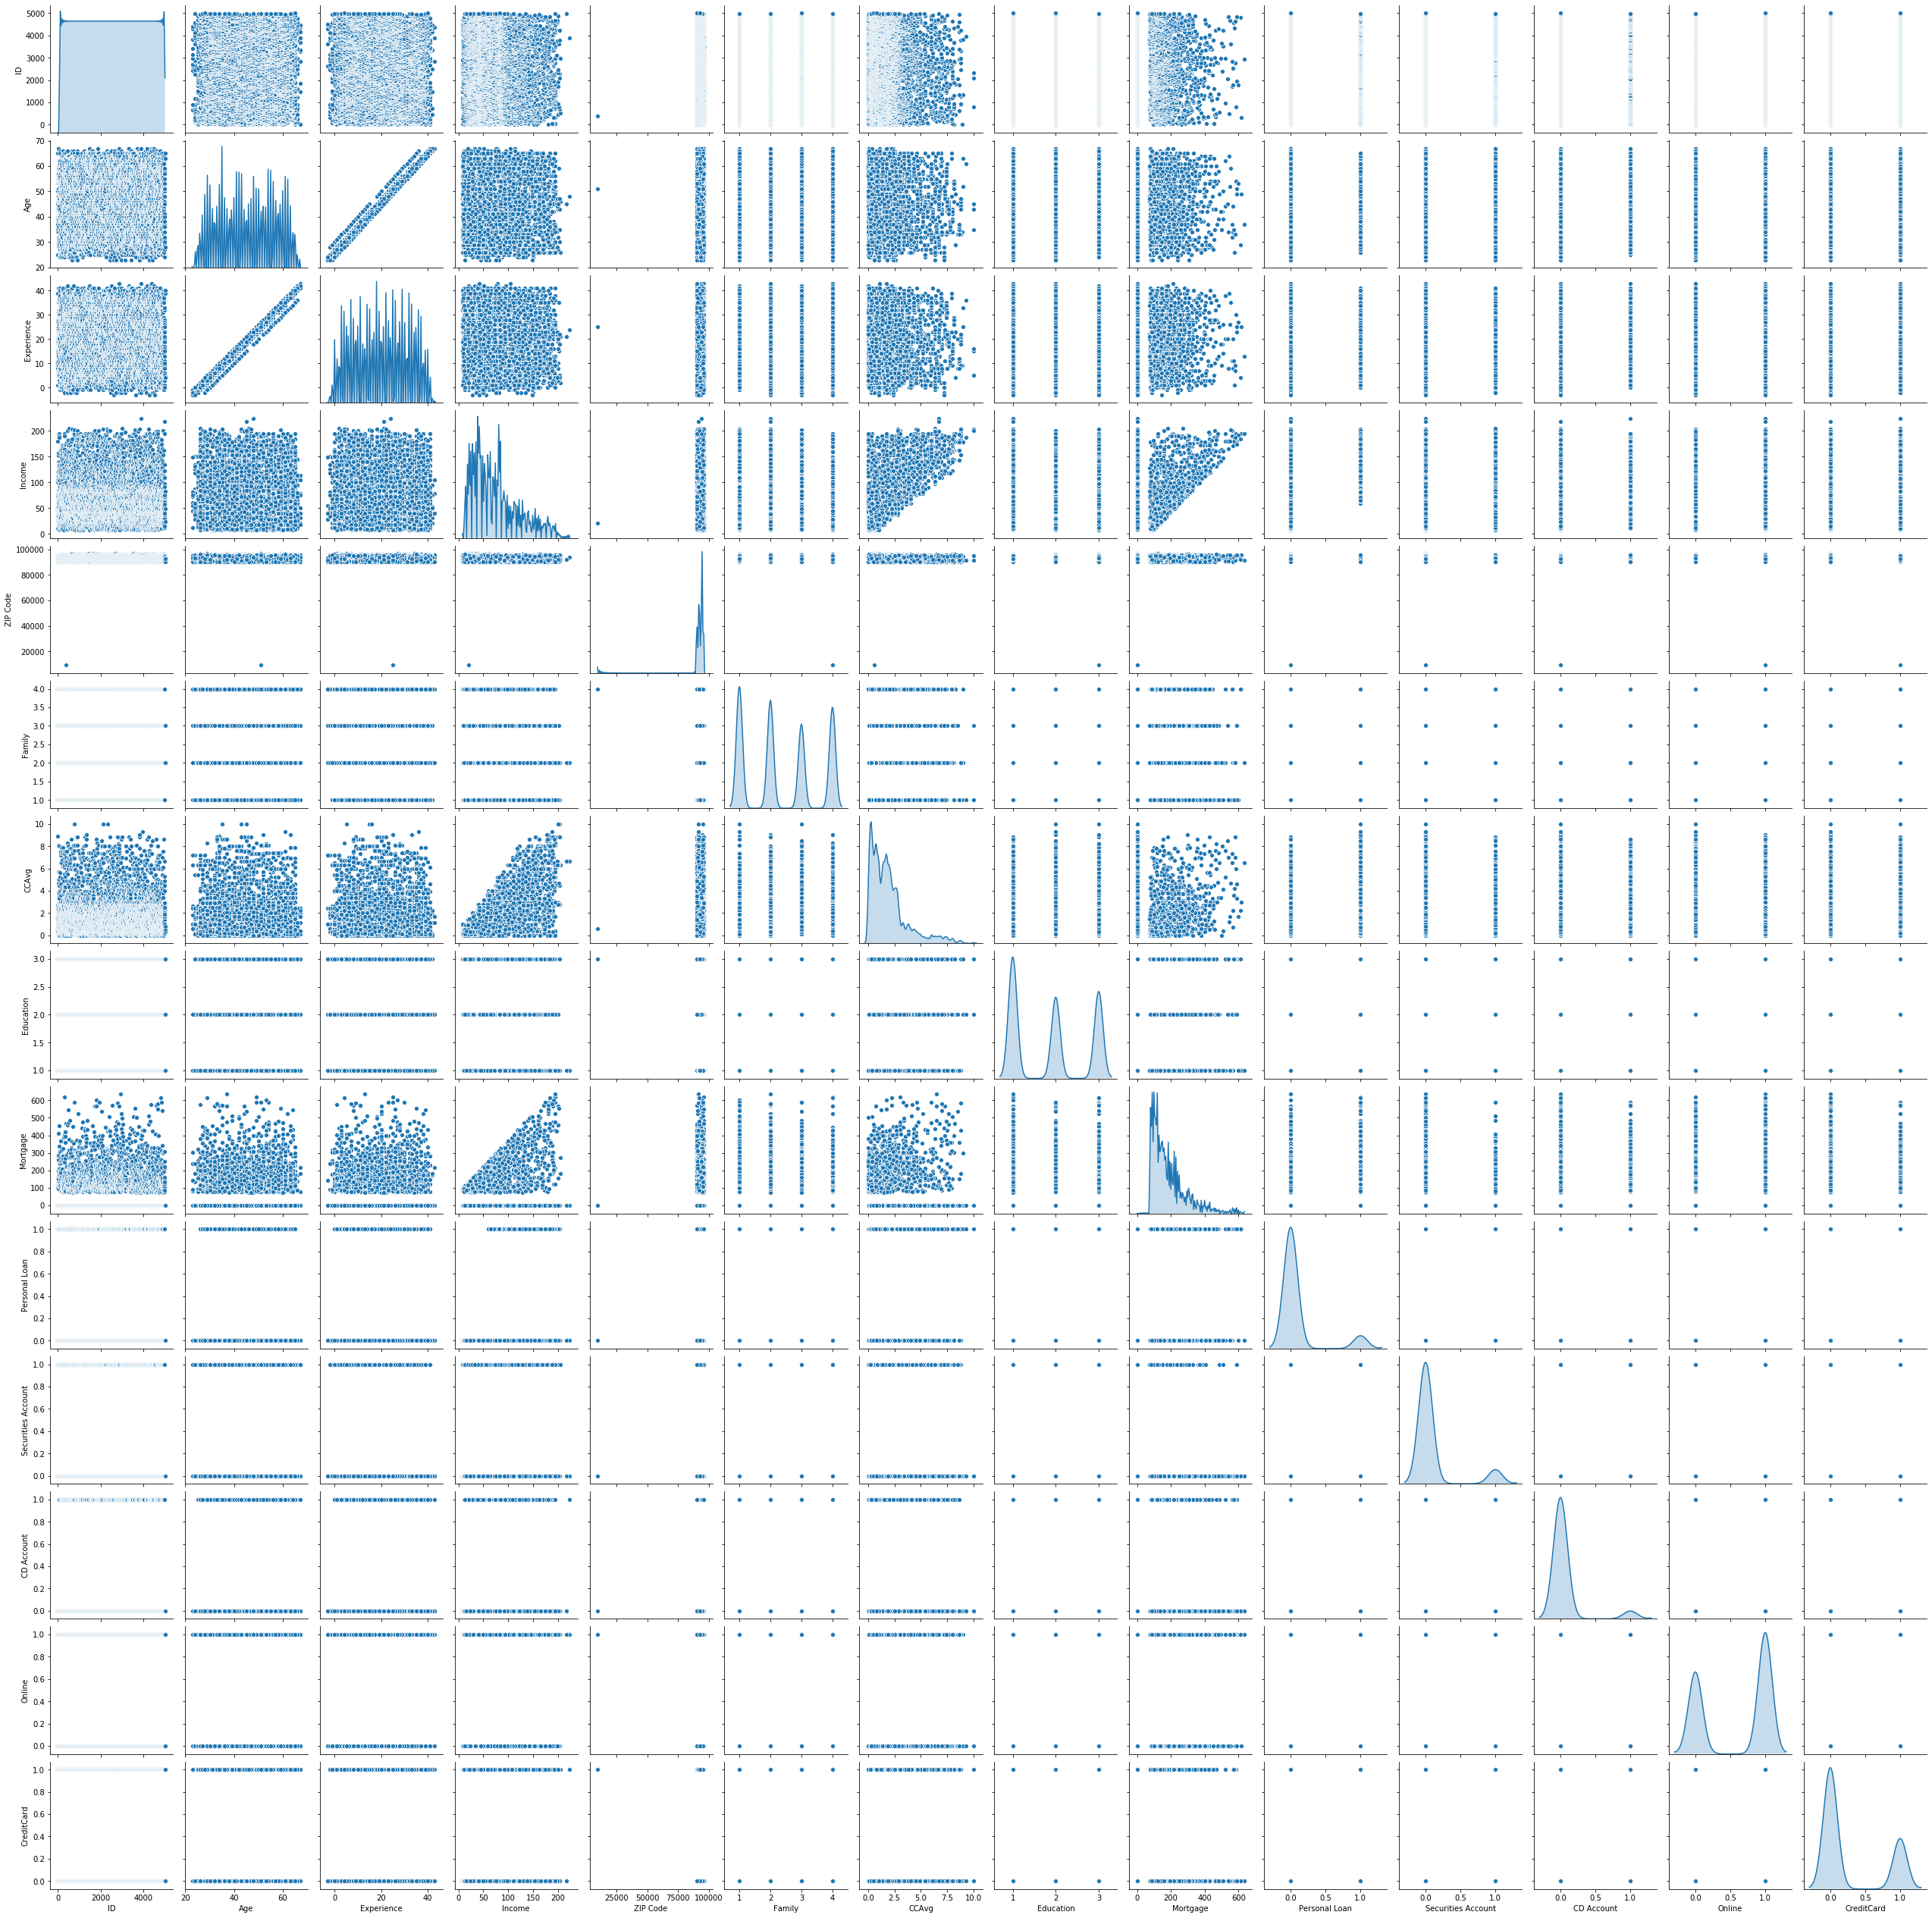

In [33]:
import pandas as p
d=p.read_csv('Bank_Personal_Loan_Modelling-1.csv')
import seaborn as s
s.pairplot(d,diag_kind='kde',diag_kws={'bw': 0.1})

In [36]:
print('id,age,experience r almost uniformly distributed.income,zip code,ccavg,mortgage are highly skewed indicating that almost all are .family,education,creditcard,online,cd account,securities account r multimodal distributions')

id,age,experience r almost uniformly distributed.income,zip code,ccavg,mortgage are highly skewed.family,education,creditcard,online,cd account,securities account r multimodal distributions


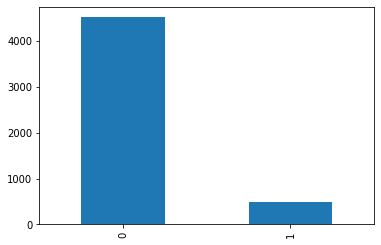

In [2]:
import matplotlib.pyplot as pl
d['Personal Loan'].value_counts().plot(kind='bar')
pl.show()

In [4]:
print('customers who accepted the personal loan offered in the last campaign is under represented, so the model will better learn to predict better, people who have rejected the loan, which is always the case but we want the model to learn well to identify the potential customers who have higher probability of purchasing the loan.')

customers who accepted the personal loan offered in the last campaign is under represented, so the model will better learn to predict better, people who have rejected the loan, which is always the case but we want the model to learn well to identify the potential customers who have higher probability of purchasing the loan.


In [5]:
from sklearn.model_selection import train_test_split
x=d.drop(columns=['ID','Personal Loan'],axis=1)
y=d[['Personal Loan']]
xt,xte,yt,yte=train_test_split(x,y,test_size=.3)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
l=LogisticRegression()
g=GaussianNB()
k=KNeighborsClassifier()
l.fit(xt,yt)
yl=l.predict(xte)
l.predict_proba(xte)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[9.99289184e-01, 7.10816191e-04],
       [9.20502976e-01, 7.94970242e-02],
       [9.94290273e-01, 5.70972739e-03],
       ...,
       [4.88458122e-01, 5.11541878e-01],
       [6.82047378e-01, 3.17952622e-01],
       [9.99844050e-01, 1.55950024e-04]])

In [11]:
g.fit(xt,yt)
yg=g.predict(xte)
g.predict_proba(xte)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[9.99957576e-01, 4.24239403e-05],
       [9.87392104e-01, 1.26078962e-02],
       [9.99670045e-01, 3.29954818e-04],
       ...,
       [2.00304612e-02, 9.79969539e-01],
       [2.49736990e-01, 7.50263010e-01],
       [9.99998884e-01, 1.11626342e-06]])

In [12]:
k.fit(xt,yt)
yk=k.predict(xte)
k.predict_proba(xte)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ]])

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(yte,yl)

array([[1323,   32],
       [  70,   75]], dtype=int64)

In [18]:
confusion_matrix(yte,yg)

array([[1233,  122],
       [  65,   80]], dtype=int64)

In [19]:
confusion_matrix(yte,yk)

array([[1319,   36],
       [ 110,   35]], dtype=int64)

In [24]:
classification_report(yte,yl)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.96      1355\n           1       0.70      0.52      0.60       145\n\n    accuracy                           0.93      1500\n   macro avg       0.83      0.75      0.78      1500\nweighted avg       0.93      0.93      0.93      1500\n'

In [25]:
classification_report(yte,yg)

'              precision    recall  f1-score   support\n\n           0       0.95      0.91      0.93      1355\n           1       0.40      0.55      0.46       145\n\n    accuracy                           0.88      1500\n   macro avg       0.67      0.73      0.70      1500\nweighted avg       0.90      0.88      0.88      1500\n'

In [26]:
classification_report(yte,yk)

'              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.95      1355\n           1       0.49      0.24      0.32       145\n\n    accuracy                           0.90      1500\n   macro avg       0.71      0.61      0.64      1500\nweighted avg       0.88      0.90      0.89      1500\n'

In [5]:
print('Logistic Regression is the best model as precision, recall,f1 score & accuracy is better than other 2 models in both classes because  like naive bayes it doesnt assume interdependence between input attributes and some of the input variables are related in the data set it is better than knn as it doesnt require input attributes to be scaled and the scales of input attributes are different in the data set.knn and naive bayes are more affected by class imbalance than logistic regression')

Logistic Regression is the best model as precision, recall,f1 score & accuracy is better than other 2 models in both classes because  like naive bayes it doesnt assume interdependence between input attributes and some of the input variables are related in the data set it is better than knn as it doesnt require input attributes to be scaled and the scales of input attributes are different in the data set.knn and naive bayes are more affected by class imbalance than logistic regression
